# CART Model 

This notebook file consists of a decision tree model built to predict the survival on the Titanic ship. 

#### Necessary Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading The Refined Dataset

In [4]:
df = pd.read_csv("ReadyToTrain.csv")

#### Viewing the Dataset sample

In [12]:
df.head()

,Unnamed: 0,Age,Sex,Pclass,Fare,SibSp,Parch,Embarked,Survived
0,0,22.0,0,3,7.2500,1,0,0,0
1,1,38.0,1,1,71.2833,1,0,1,1
2,2,26.0,1,3,7.9250,0,0,0,1
3,3,35.0,1,1,53.1000,1,0,0,1
4,4,35.0,0,3,8.0500,0,0,0,0


#### Spliting The Dataset

In [18]:
X = df.iloc[ : , 1:8]
Y = df.iloc[ : , 8:]

#### Feature Scaling Of The Dataset

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X =  sc.transform(X)
X

array([[-2.2361547 , -2.28188924, -1.77269184, ..., -0.08185509,
        -1.06164631, -1.46419714],
       [-2.14514077,  2.09988449, -4.63707508, ..., -0.08185509,
        -1.06164631,  1.01333632],
       [-2.21340122,  2.09988449, -1.77269184, ..., -0.90511835,
        -1.06164631, -1.46419714],
       ...,
       [-2.22477796,  2.09988449, -1.77269184, ..., -0.08185509,
         2.02002239, -1.46419714],
       [-2.21340122, -2.28188924, -4.63707508, ..., -0.90511835,
        -1.06164631,  1.01333632],
       [-2.17927099, -2.28188924, -1.77269184, ..., -0.90511835,
        -1.06164631,  3.49086977]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

### Building The Classification Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="gini", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    ypred = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,ypred))
    print("For max depth = ",i, " : ",accuracy_score(y_test,ypred))

For max depth =  1  :  0.776536312849162
For max depth =  2  :  0.7206703910614525
For max depth =  3  :  0.8044692737430168
For max depth =  4  :  0.7821229050279329
For max depth =  5  :  0.7932960893854749
For max depth =  6  :  0.776536312849162
For max depth =  7  :  0.7486033519553073


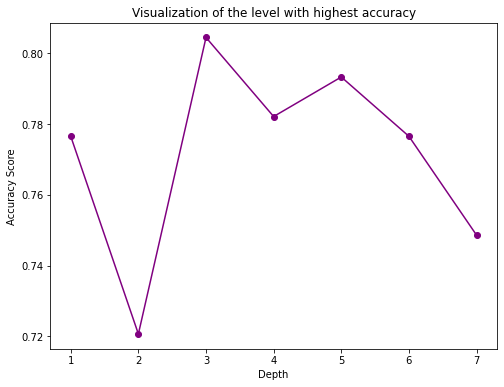

In [39]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="purple", marker = "o")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.title("Visualization of the level with highest accuracy")
plt.xticks(range(1,8))
plt.show()

The decision tree has the highest accuracy when depth is 3. Now lets use this depth to built our classifier tree.

In [43]:
clf_tr = DecisionTreeClassifier(criterion="gini", random_state = 100, max_depth = 3)
clf_tr.fit(X,Y)
pred_tree = clf_tr.predict(X_test)
print(pred_tree)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1]
